# Practica 1
## Análisis exploratorio de datos y Extracción de Características
## Autor: Diego Tapia

## Desarrollo

### Instalación e importación de librerías

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


### 1. Carga y exploración inicial
Nombre del dataset: Bank Marketing

Enlace : https://archive.ics.uci.edu/dataset/222/bank+marketing

Descripción:
 
Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y).


Numero de variables: 17

Numero de instacias: 4059

Descripción de las variables:

### Variables de entrada:

   ### Datos del cliente bancario:
   1 - Edad (numérico)

   2 - Trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "directivo", "ama de casa", "emprendedor", 
   "estudiante", "trabajador manual", "autónomo", "jubilado", "técnico", "servicios")

   3 - Estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)

   4 - Educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")

   5 - Incumplimiento: ¿tiene crédito en incumplimiento? (binario: "sí", "no")

   6 - Saldo: saldo promedio anual, en euros (numérico)

   7 - Vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")

   8 - Préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

   ### Relacionado con el último contacto de la campaña actual:

   9 - Contacto: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")

  10 - Día: último día de contacto del mes (numérico)

  11 - Mes: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")

  12 - Duración: duración del último contacto, en segundos (numérico)

   ### Otros atributos:

  13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

  14 - Pdays: número de días que transcurrieron después de que el cliente fue contactado por última vez en una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

  15 - Anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - ResultadoPrevio: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

### Variable de salida (objetivo deseado):
17 - y - ¿el cliente ha suscrito un depósito a plazo fijo? (binario: "sí", "no")

In [3]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = 'https://raw.githubusercontent.com/juandtap/IA_practica_01/main/bank.csv'
# el separador es una tabulacion (;) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep=';', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 4521 filas x 17 columnas


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Resumen estadístico
Se calcula las medidas descriptivas de las variables que tienen formato numérico

In [5]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Conclusiones de la exploración inicial (estadisticas)

**Año de nacimiento medio**: el año de nacimiento medio es 1968, lo que quiere decir que la mayoría de los clientes son adultos mayores (55 años). 

**Año de nacimiento máximo**: El año de nacimiento máximo es 1996, lo que quiere decir que los clientes más jóvenes son de 27 de años.  

**Cantidad gastada en vinos media**: Esta cantidad es $ 303.93, que es mayor al resto de medias de gastos en otros productos en el dataset. Lo cual tiene sentido ya que la mayoría de los clientes son adultos mayores. 

**Numero de compras web**: Se asume que el valor es del último mes. La media de numero de compras web es de 4, mientras que el máximo es de 27 y el mínimo de 0, De acuerdo a la media de 4 se puede decir que es un medio de compra bueno (no muy alejado de 5.79 que es la media de compras en la tienda) y puede crecer por lo que se debería enfocarse en la mejora del sitio web en el tema de usabilidad ya que como se vio anteriormente la mayoría de los clientes son adultos mayores (media de 55 años). 

## 2. Visualización de datos

### Graficos de frecuencia de clase

Variable: Salida Y

y
no     4000
yes     521
Name: count, dtype: int64

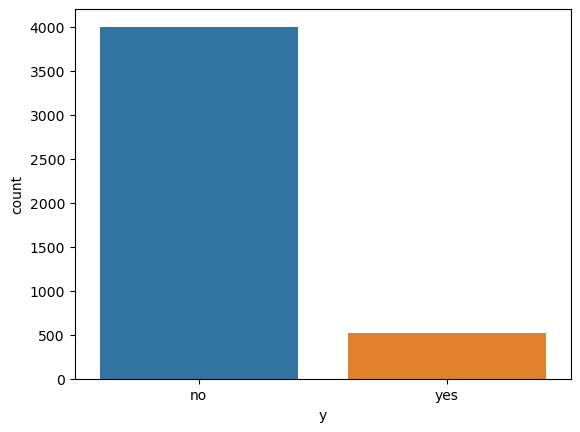

In [6]:
Y = dataframe['y']
sns.countplot(x=Y)
dataframe['y'].value_counts()

La variable de salida 'y' tiene dos los valores de "yes" y "no" , para un mejor manejo de los datos, estos se convertiran a un formato binario

```"no" = 0```  

```"yes = 1```

ademas se renombra la columna 'y' por 'Resultado'

In [34]:
dataframe['y'] = dataframe['y'].map({'yes' : 1, 'no' : 0})
dataframe.rename(columns={'y':'resultado'}, inplace=True)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


resultado
0    4000
1     521
Name: count, dtype: int64

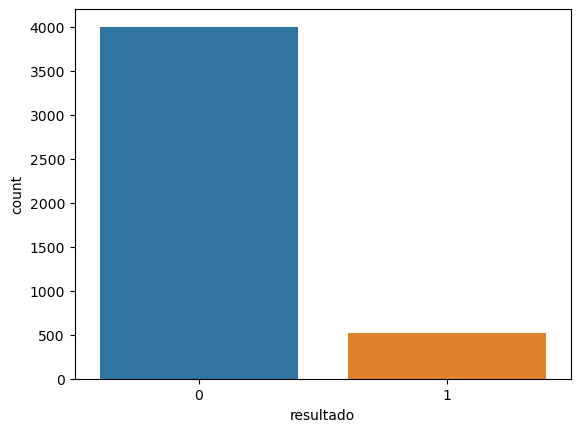

In [35]:
Y = dataframe['resultado']
sns.countplot(x=Y)
dataframe['resultado'].value_counts()

Variable: Education (Educacion)

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

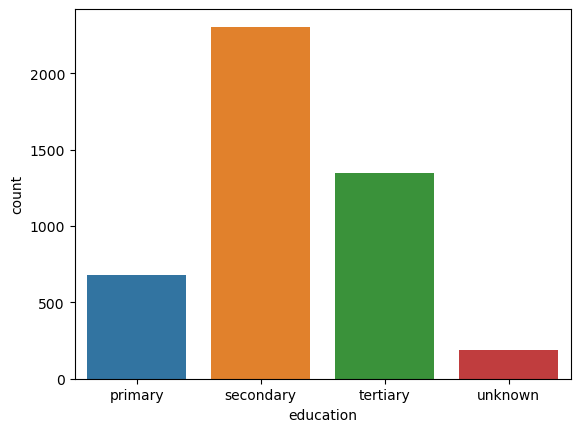

In [7]:
Y = dataframe['education']
sns.countplot(x=Y)
dataframe['education'].value_counts()

Variable: Trabajo

In [10]:
dataframe['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

### Ordenamiento del dataframe por una variable

Balance

In [36]:
dataframeTratamiento = dataframe.sort_values(by=['balance'])
# Mostrar los diez primeros datos
dataframeTratamiento.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,0
2538,44,management,married,secondary,no,-1746,yes,no,unknown,20,jun,218,1,-1,0,unknown,0
856,49,technician,married,secondary,yes,-1680,yes,yes,unknown,27,jun,92,4,-1,0,unknown,0
3584,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,may,309,3,355,4,failure,0
2072,44,management,single,tertiary,no,-1313,yes,yes,cellular,15,may,104,10,-1,0,unknown,0
1972,42,technician,married,secondary,no,-1310,yes,yes,unknown,28,may,162,1,-1,0,unknown,0
2599,52,management,married,tertiary,no,-1224,yes,no,cellular,7,may,253,4,-1,0,unknown,0
804,40,management,married,tertiary,no,-1212,yes,no,cellular,15,may,1259,2,333,18,failure,0
189,56,retired,married,secondary,no,-1206,yes,no,cellular,15,jun,382,2,-1,0,unknown,1


### Visualización 2D: varias variables para análisis
Variables: 
* age  (Edad), 
* balance (Balance/saldo)

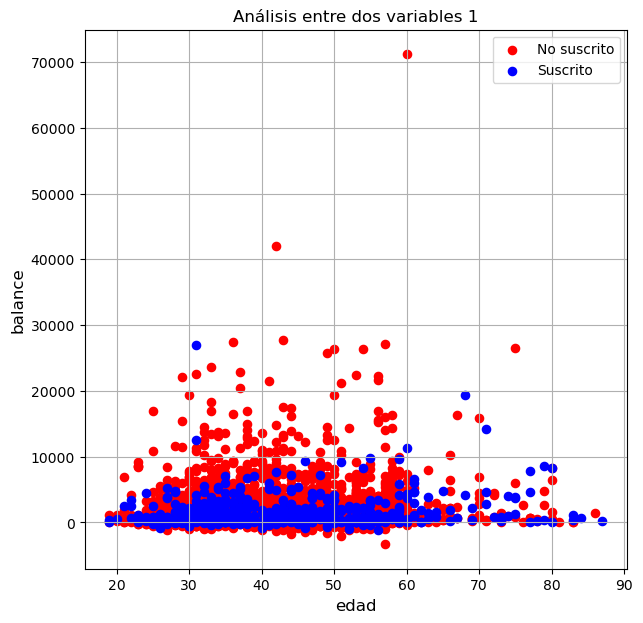

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('edad', fontsize =12)
ax.set_ylabel('balance', fontsize = 12)
ax.set_title('Análisis entre dos variables 1', fontsize = 12)
targets = [0, 1] 
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indexTokeep = dataframeTratamiento['resultado'] == target
    ax.scatter(dataframeTratamiento.loc[indexTokeep, 'age'],
               dataframeTratamiento.loc[indexTokeep, 'balance'],
               c = color,
               s = 35 # tamaño de los puntos
               )
ax.legend(['No suscrito','Suscrito'])
ax.grid()
plt.show()



### Visualización 2D: una variable para análisis
Variable "Income" (ingreso anual)

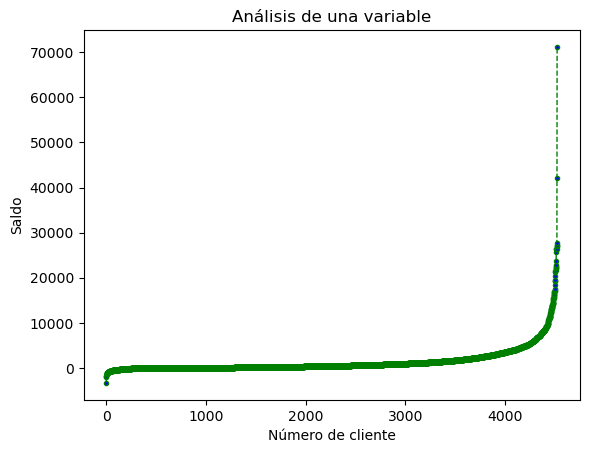

In [38]:
dataframeTratamientoOrdenado = dataframeTratamiento.sort_values(by=["balance"])
variable_analisis = dataframeTratamientoOrdenado.loc[:,['balance']]
cantidad_muestras = len(dataframeTratamientoOrdenado.index)
array_cantidad_muestras = range(cantidad_muestras)

plt.plot(array_cantidad_muestras, variable_analisis, color= 'green', linestyle="dashed", linewidth = 1, marker='o', markerfacecolor='blue', markersize = 3)
plt.title('Análisis de una variable')
plt.xlabel('Número de cliente')
plt.ylabel('Saldo')
plt.show()

## 3. Análisis de variables categóricas

In [39]:

def descripcion_cantidad_categorias(dataframe, categorical_features):
    cantidad_variables_categoricas = len(categorical_features)
    for var in categorical_features:
        cantidad_categorias = dataframe[var].nunique()
        print(f"Cantidad de categorías en la variable {var} : {cantidad_categorias}")
    return cantidad_variables_categoricas


In [40]:

columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


La variable “Dt_Customer” que almacena la fecha de registro del cliente es una variable de tipo numérica ya que representa tiempo,  por lo que procedemos a eliminarla de la lista de variables categóricas. 

In [41]:
#columnas_categoricas.pop()
cantidad_variables_categoricas = descripcion_cantidad_categorias(dataframe, columnas_categoricas)
print(f"Cantidad de variables categóricas : {cantidad_variables_categoricas}")


Cantidad de categorías en la variable job : 12
Cantidad de categorías en la variable marital : 3
Cantidad de categorías en la variable education : 4
Cantidad de categorías en la variable default : 2
Cantidad de categorías en la variable housing : 2
Cantidad de categorías en la variable loan : 2
Cantidad de categorías en la variable contact : 3
Cantidad de categorías en la variable month : 12
Cantidad de categorías en la variable poutcome : 4
Cantidad de variables categóricas : 9


Hay 2 variables categóricas 

* 'Education' (Educacion), 
* 'Marital_Status' (Estado civil)

Las variables 'Education' y 'Marital_Status' son variables categóricas nominales

En la variable 'Education'  se tiene las siguientes categorias:

In [21]:
dataframe['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

En la variable 'Marital_Status' se tiene las siguentes categorias:

In [22]:
dataframe['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

## 4. Análisis de correlación

### Análisis entre todas las variables

In [42]:
cr = dataframe.corr(numeric_only=True)
cr.head(10)

,age,balance,day,duration,campaign,pdays,previous,resultado
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
resultado,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


### Un mapa de calor simple

<Axes: title={'center': 'Mapa de calor 1'}>

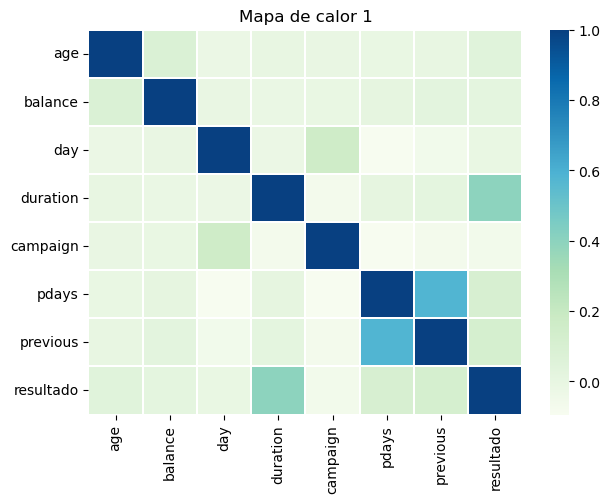

In [45]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax  = plt.subplots(figsize = (7,5))
plt.title("Mapa de calor 1")
sns.heatmap(cr, cmap= "GnBu", linewidths = 0.30, annot=False)

### Mapa de calor personalizado
Solo se incluye la región inferior

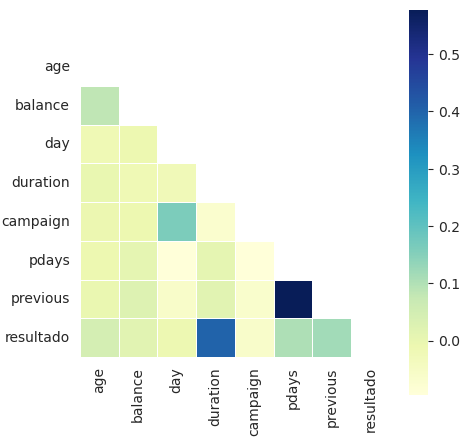

In [46]:
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Análisis a partir de los valores: correlaciones positivas

Se hace una análisis de las correlaciones con respecto a la variable 'Response'

In [49]:
dfCorrOrdenado=cr.sort_values(by=['resultado'], ascending=False)
dfCorrOrdenado['resultado'].head(10)

resultado    1.000000
duration     0.401118
previous     0.116714
pdays        0.104087
age          0.045092
balance      0.017905
day         -0.011244
campaign    -0.061147
Name: resultado, dtype: float64

### Análisis a partir de los valores: correlaciones negativas

In [51]:
dfCorrOrdenado=cr.sort_values(by=['resultado'], ascending=True)
dfCorrOrdenado['resultado'].head(10)

campaign    -0.061147
day         -0.011244
balance      0.017905
age          0.045092
pdays        0.104087
previous     0.116714
duration     0.401118
resultado    1.000000
Name: resultado, dtype: float64

### Visualización para análisis entre dos variables
Se hace un análisis de correlacion entre las variables 'Income' y 'Year_Birth'

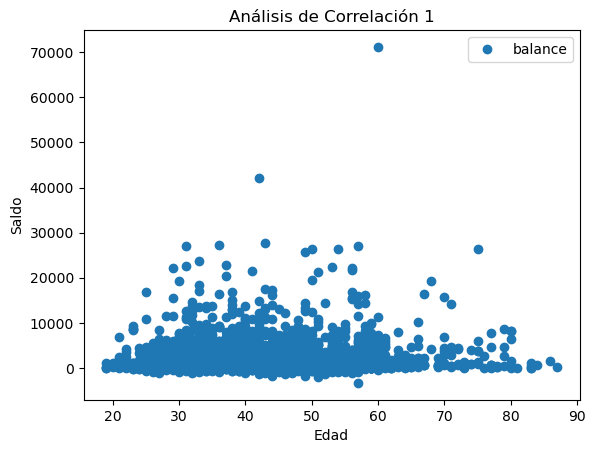

In [29]:
variable_1_analisis = "age"
variable_2_analisis = "balance"
dataframe.plot(x = variable_1_analisis, y = variable_2_analisis, style="o")
plt.title("Análisis de Correlación 1")
plt.xlabel("Edad")
plt.ylabel("Saldo")
plt.show()


## 5. Manejo de datos faltantes y variables no relevantes

Se descartan algunas variables que se supone no aportan al análisis o tienen datos faltantes.

Se elimina la variable 'ID' que no aporta información util para los análisis



In [52]:
#Se eliminan algunas variables
#dataframe=dataframe.drop(['ID'], axis=1)
print(dataframe.shape)
dataframe.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


## 6. Selección y extracción de variables

Selección de variables según el análisis de correlación


In [61]:

variables_seleccionadas = ['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases',  'Response']
dataframe_nuevo = dataframe[variables_seleccionadas]
print(dataframe_nuevo.shape)
dataframe_nuevo.head()


(2240, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,1957,58138.0,635,546,10,8,4,1
1,1954,46344.0,11,6,1,1,2,0
2,1965,71613.0,426,127,2,8,10,0
3,1984,26646.0,11,20,0,2,4,0
4,1981,58293.0,173,118,3,5,6,0


## 7. Segmentación y filtros

Se ordena el nuevo dataframe por la variable Year_Birth (Año Nacimiento) 

In [63]:
dataframe_tratamiento = dataframe_nuevo.sort_values(by=['Year_Birth'])
print(dataframe_tratamiento.shape)
dataframe_tratamiento.head()

(2240, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
239,1893,60182.0,8,5,0,1,2,0
339,1899,83532.0,755,562,6,4,4,0
192,1900,36640.0,15,8,1,2,2,0
1950,1940,51141.0,144,7,1,3,4,0
424,1941,93027.0,1285,716,10,7,5,0


### Filtración por variables: 'Year_Birth' e 'Income'

para los valores maximos y minimos de las variables se toma como referencia el grafico de correlacion 1 (2 variables)

In [65]:

# limits de valores para 'Income'
income_min = 20000
income_max = 100000
# limites de valores para 'Year_Birth'
year_min = 1960
year_max = 1990

dataframe_filtrado = dataframe_tratamiento.loc[(dataframe_tratamiento['Year_Birth'] >= year_min) &  (dataframe_tratamiento['Year_Birth'] <= year_max)]
dataframe_filtrado = dataframe_filtrado.loc[(dataframe_tratamiento['Income'] >= income_min) &  (dataframe_tratamiento['Income'] <= income_max)]
print(dataframe_filtrado.shape)
dataframe_filtrado.head(10)


(1493, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
640,1960,63381.0,571,142,5,4,13,0
366,1960,79530.0,333,815,10,4,11,0
1373,1960,50611.0,459,24,5,4,7,0
633,1960,32218.0,10,15,1,2,3,1
1375,1960,48904.0,283,38,2,7,4,0
627,1960,70971.0,1001,572,11,11,5,1
387,1960,63381.0,571,142,5,4,13,0
619,1960,30522.0,179,83,2,1,9,0
96,1960,47916.0,505,26,4,7,6,0
1371,1960,50523.0,51,24,0,2,4,0


Se calcula la media de todas las variables para lo clientes con el mismo Año de nacimiento e Ingresos anuales y
se agrupa por estas dos ultimas variables (Year_Birth , Income)

In [79]:
dataframe_segmento = dataframe_filtrado.groupby(['Year_Birth','Income'])
dataframe_segmento = dataframe_segmento.mean()
dataframe_segmento.head(10)

MntWines  MntMeatProducts  NumCatalogPurchases  \
Year_Birth Income                                                    
1960       22123.0       3.0             24.0                  1.0   
           28520.0      11.0             10.0                  1.0   
           29315.0      13.0             14.0                  0.0   
           29440.0      17.0             14.0                  0.0   
           30507.0      65.0             74.0                  1.0   
           30522.0     179.0             83.0                  2.0   
           31454.0      28.0             11.0                  0.0   
           32218.0      10.0             15.0                  1.0   
           38201.0     233.0             23.0                  1.0   
           39228.0       7.0              6.0                  0.0   

                    NumWebPurchases  NumStorePurchases  Response  
Year_Birth Income                                                 
1960       22123.0              2.0                3.0       0.0  
           28520.0              1.0                2.0       0.0  
           29315.0              2.0                4.0       0.0  
           29440.0              1.0                4.0       0.0  
           30507.0              5.0                4.0       0.0  
           30522.0              1.0                9.0       0.0  
           31454.0              2.0                3.0       0.0  
           32218.0              2.0                3.0       1.0  
           38201.0              5.0                5.0       0.0  
           39228.0              0.0                3.0       0.0

Se agrupa solo con una variable 'Year_Birth' (Año nacimiento)

In [80]:
dataframe_segmento = dataframe_segmento.groupby('Year_Birth')
dataframe_segmento.head(2)

MntWines  MntMeatProducts  NumCatalogPurchases  \
Year_Birth Income                                                    
1960       22123.0       3.0             24.0                  1.0   
           28520.0      11.0             10.0                  1.0   
1961       27116.0      12.0             21.0                  0.0   
           27215.0      30.0             22.0                  1.0   
1962       27238.0      37.0             17.0                  0.0   
...                      ...              ...                  ...   
1988       23331.0      54.5             54.0                  0.5   
1989       21474.0       6.0             24.0                  1.0   
           25443.0       1.0              3.0                  0.0   
1990       24279.0      16.0             21.0                  1.0   
           24683.0       8.0             10.0                  0.0   

                    NumWebPurchases  NumStorePurchases  Response  
Year_Birth Income                                                 
1960       22123.0              2.0                3.0       0.0  
           28520.0              1.0                2.0       0.0  
1961       27116.0              2.0                3.0       0.0  
           27215.0              2.0                4.0       0.0  
1962       27238.0              3.0                3.0       0.0  
...                             ...                ...       ...  
1988       23331.0              4.0                4.0       0.0  
1989       21474.0              3.0                2.0       1.0  
           25443.0              1.0                3.0       0.0  
1990       24279.0              4.0                3.0       0.0  
           24683.0              2.0                4.0       0.0  

[62 rows x 6 columns]

## 8. Análisis y eliminación de outliers

De ```dataframe_filtrado``` se normaliza los datos a valores entre 0 y 1

In [85]:
from sklearn import preprocessing
data_scaled_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaled_minmax.fit_transform(dataframe_filtrado)
dataframe_scaled_minmax = pd.DataFrame(data=data_scaled_minmax, columns=dataframe_filtrado.columns)
print(dataframe_scaled_minmax.shape)
dataframe_scaled_minmax.head(10)

(1493, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
1,0.0,0.755274,0.224092,0.828077,0.909091,0.363636,0.818182,0.0
2,0.0,0.387567,0.308883,0.023398,0.454545,0.363636,0.454545,0.0
3,0.0,0.153699,0.006729,0.014242,0.090909,0.181818,0.090909,1.0
4,0.0,0.365863,0.190444,0.037640,0.181818,0.636364,0.181818,0.0
5,0.0,0.646446,0.673620,0.580875,1.000000,1.000000,0.272727,1.0
6,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
7,0.0,0.132135,0.120458,0.083418,0.181818,0.090909,0.636364,0.0
8,0.0,0.353300,0.339838,0.025432,0.363636,0.636364,0.363636,0.0
9,0.0,0.386448,0.034320,0.023398,0.000000,0.181818,0.181818,0.0


### Visualización de outliers en figura 3D

Se utiliza las variables 'Year_Birth', 'Income' y 'MntWines'

In [88]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

columnas_seleccionadas =  dataframe_scaled_minmax[['Year_Birth', 'Income' , 'MntWines']]

# se convierten las columnas seleccionadas a numpy.ndarray
data_array = columnas_seleccionadas.to_numpy()

# Se define un umbral de distancia euclidiana para identificar outliers
umbral = 1.2

# Calcula la distancia euclidiana desde el origen para cada uno de los puntos
distancias = np.linalg.norm(data_array, axis=1)

# indentificacion de los indices de los outliers
outliers_indices = np.where(distancias > umbral)[0]

# se separa los datos en dos grupos: puntos normales y outliers
puntos_normales  = data_array[distancias <= umbral]
outliers = data_array[outliers_indices]

# Se crea la figura 3d interactiva (esfera)
fig3d = go.Figure()

# plotea los puntos de datos normales dentro de la esfera

fig3d.add_trace(go.Scatter3d(
    x = puntos_normales[:,0],
    y = puntos_normales[:,1],
    z = puntos_normales[:,2],
    mode='markers',
    marker={'color':'blue', 'size': 4},
    name='Puntos Normales'

))

# plotea los outliers fuera de la esfera
fig3d.add_trace(go.Scatter3d(
    x=outliers[:, 0],
    y=outliers[:, 1],
    z=outliers[:, 2],
    mode='markers',
    marker={'color':'red', 'size':4},
    name='Outliers'
))

# Crea una esfera que excluye los outliers
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = umbral * np.outer(np.cos(u), np.sin(v))
y = umbral * np.outer(np.sin(u), np.sin(v))
z = umbral * np.outer(np.ones_like(u), np.cos(v))

fig3d.add_trace(go.Surface(x=x, y=y, z=z, colorscale='greens', opacity=0.3, showscale=False, name='Esfera Umbral'))

# Se configura el diseño de la figura
fig3d.update_layout(
    scene={
        'xaxis_title':'X: AÑO NACIMIENTO', #EJE X
        'yaxis_title':'Y: INGRESO ANUAL', #EJE Y
        'zaxis_title':'Z: GASTO EN VINO' #EJE Z
    },
    scene_camera={
        'center':{'x':0, 'y':0, 'z':0},
        'eye':{'x':1.25, 'y':1.25, 'z':1.25}
    }
)

# Se muestra la figura interactiva
fig3d.show()

Se guarda el dataframe con los outliers filtrados

In [93]:
dataframe_scaled_minmax['DIST'] = np.sqrt(dataframe_scaled_minmax['Year_Birth']**2 + dataframe_scaled_minmax['Income']**2 + dataframe_scaled_minmax['MntWines']**2)
# Se filtra el DataFrame para obtener solo las muestras dentro de la esfera
df_filtrado = dataframe_scaled_minmax[dataframe_scaled_minmax['DIST'] <= umbral]
df_filtrado = df_filtrado.drop(['DIST'], axis=1)
print(df_filtrado.shape)
df_filtrado.head(20)


(1431, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
1,0.0,0.755274,0.224092,0.828077,0.909091,0.363636,0.818182,0.0
2,0.0,0.387567,0.308883,0.023398,0.454545,0.363636,0.454545,0.0
3,0.0,0.153699,0.006729,0.014242,0.090909,0.181818,0.090909,1.0
4,0.0,0.365863,0.190444,0.037640,0.181818,0.636364,0.181818,0.0
5,0.0,0.646446,0.673620,0.580875,1.000000,1.000000,0.272727,1.0
6,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
7,0.0,0.132135,0.120458,0.083418,0.181818,0.090909,0.636364,0.0
8,0.0,0.353300,0.339838,0.025432,0.363636,0.636364,0.363636,0.0
9,0.0,0.386448,0.034320,0.023398,0.000000,0.181818,0.181818,0.0


## 9. Conlusiones

En esta guía se ha revisado métodos para visualizar estadísticas o gráficos, para así tener una idea inicial del dataset con el que se está trabajando. También se ha revisado métodos para descubrir valores atípicos conocidos también como “Outliers” y como extraerlos o filtrarlos para un análisis más preciso. Por supuesto, los métodos o estrategias mostradas en esta guía no siempre deben seguirse estrictamente ya que dependerá de los datos del “dataset” con el que se está trabajando. 

El análisis de los datos es importante para llegar a conclusiones y consecuentemente a una toma de decisiones. En este caso se ha trabajado con el “dataset” de una tienda (donde se asume que es una muestra) donde se a partir de un analisis de correlacion con respecto a la variable “Respuesta” que indica si tuvo efecto la última campaña publicitaria, (1=Si, 0 = No) se puede llegar a observar que las variables que más influyen son los “ingresos anuales” de los clientes y la “cantidad de gasto en vino”, y no la variable de “año de nacimiento” de la cual se puede concluir que se está tratando con clientes que en su mayoría son adultos mayores. 

Con estas conclusiones y también las observaciones de otras variables como “Numero de compras Web” se puede llegar a considerar mejorar el sitio web de compra, haciéndolo más intuitivo para los clientes que son adultos mayores. 

## Referencias

guia:

https://genscinet.com/analisis-exploratorio/

Dataset:

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

